
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Oct 14, 2019)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval
    * (b) the point estimate
    * (c) the margin of error.

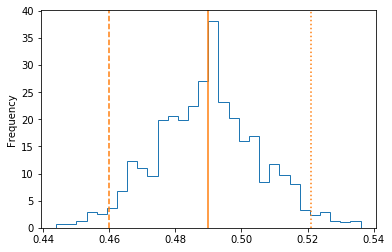

In [3]:
import math
import io

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import scipy.stats
import scipy.optimize
import scipy.spatial

largepoll = pd.read_csv('poll-larger.csv')
largepoll['vote'].value_counts(normalize=True)

def sample(orgeronWinPercent,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < orgeronWinPercent,'Saban','Orgeron')})

distDF = pd.DataFrame([sample(0.511)['vote'].value_counts(normalize=True) for i in range(1000)])
distDF.head()

distDF['Orgeron'].plot(kind='hist',histtype='step',bins=30, density=True)

plt.axvline(distDF['Orgeron'].quantile(0.025), c='C1',linestyle='--')
plt.axvline(distDF['Orgeron'].quantile(0.500), c='C1')
plt.axvline(distDF['Orgeron'].quantile(0.975), c='C1',linestyle=':')

In [8]:
def samplingdist(orgeronWinPercent,n=1000):
    return pd.DataFrame([sample(orgeronWinPercent,n)['vote'].value_counts(normalize=True) for i in range(1000)])

def quantiles(orgeronWinPercent,n=1000):
    distDF = samplingdist(orgeronWinPercent,n)
    return distDF['Orgeron'].quantile(0.025), distDF['Orgeron'].quantile(0.975)

quantiles(0.51)

(0.463, 0.521)

(0.4897, 0.5097025000000001)

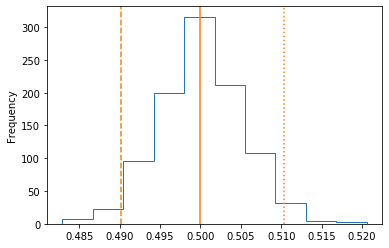

In [12]:
distDF = samplingdist(0.50,10000)

distDF['Orgeron'].plot(kind='hist', histtype='step')
plt.axvline(distDF['Orgeron'].quantile(0.025), c='C1',linestyle='--')
plt.axvline(distDF['Orgeron'].quantile(0.500), c='C1')
plt.axvline(distDF['Orgeron'].quantile(0.975), c='C1',linestyle=':')

quantiles(0.5,10000)

#plot and quantiles show that the 95% confidence interval is: [0.49, 0.51]
#estimate=0.5+/-0.01

95% Confidence Interval: .4897 - .5097025

Point Estimate: .4997

Margin of Error: 1%